In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.cuda
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import os
from joblib import dump, load
from PIL import Image
from tqdm.notebook import tqdm
from torch.nn.functional import relu
from torch.utils.data import DataLoader, Dataset
from SHG import SHG
from utils import *
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
""" PATHS """
# Bottleneck data path
DATA_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/latent_space_data/data/"

# Ground truth heatmaps
HEATMAPS_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/train/heatmaps/"

# Path for model
MODEL_DIR = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/models/Mon_Apr_12_18-11-59_2021/epoch_46.pth"

# Path for mean rgb
average_rgb = np.loadtxt("./average_rgb.npy")

# Saving path
SAVING_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/latent_space/"

In [3]:
""" LOADING """
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_without_branches = SHG(num_hourglasses = 1, use_skip_connections = False).to(device)
model_with_branches = SHG(num_hourglasses = 1, use_skip_connections = True).to(device)

model_without_branches.load_state_dict(torch.load(MODEL_DIR))
model_with_branches.load_state_dict(torch.load(MODEL_DIR))

model_without_branches.eval()
model_with_branches.eval()

X, y, IDs = load_data(DATA_PATH, HEATMAPS_PATH)
X = StandardScaler().fit_transform(X)

In [4]:
X = TSNE(learning_rate = 100).fit_transform(X)

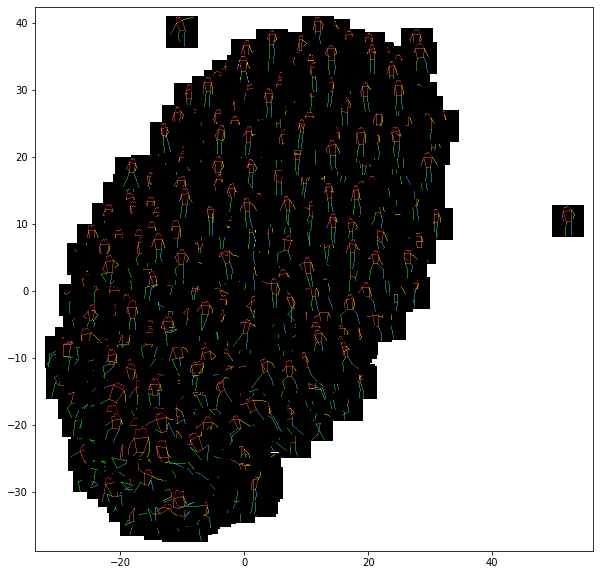

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))

for x, y_ in tqdm(zip(X, y), leave = False, total = len(X)):
    y_ = turn_featuremaps_to_keypoints(y_)
    image = draw_skeleton(y_)
    im = OffsetImage(image, zoom = 0.5)
    ab = AnnotationBbox(im, (x[0], x[1]), xycoords = "data", frameon = False)
    ax.add_artist(ab)
    ax.update_datalim([(x[0], x[1])])
    ax.autoscale()

plt.show()

In [ ]:
model, sil, centroids = get_kmeans(X)

In [ ]:
cluster_1 = X[model.labels_.astype("bool")]
cluster_1_heatmaps = y[model.labels_.astype("bool")]

cluster_2 = X[np.logical_not(model.labels_.astype("bool"))]
cluster_2_heatmaps = y[np.logical_not(model.labels_.astype("bool"))]

In [ ]:
# Showing cluster 1
fig, ax = plt.subplots(figsize = (10, 10))

for x, y_ in tqdm(zip(cluster_1, cluster_1_heatmaps), leave = False, total = len(cluster_1)):
    y_ = turn_featuremaps_to_keypoints(y_)
    image = draw_skeleton(y_)
    im = OffsetImage(image, zoom = 0.5)
    ab = AnnotationBbox(im, (x[0], x[1]), xycoords = "data", frameon = False)
    ax.add_artist(ab)
    ax.update_datalim([(x[0], x[1])])
    ax.autoscale()

plt.show()

In [ ]:
# Showing cluster 1
fig, ax = plt.subplots(figsize = (10, 10))

for x, y_ in tqdm(zip(cluster_1, cluster_1_heatmaps), leave = False, total = len(cluster_1)):
    y_ = turn_featuremaps_to_keypoints(y_)
    image = draw_skeleton(y_)
    im = OffsetImage(image, zoom = 0.5)
    ab = AnnotationBbox(im, (x[0], x[1]), xycoords = "data", frameon = False)
    ax.add_artist(ab)
    ax.update_datalim([(x[0], x[1])])
    ax.autoscale()

plt.show()